In [46]:
!pip install tensorflow imageio tensorflow.docs

In [47]:
##IMPORTING THE DEPENDENCIES

import glob #'glob' is a library used to match the patterns
import imageio #used for reading and writing of images
import matplotlib.pyplot as plt # to visualize the data
import numpy as np #for scientific computation
import os #to navigate/create dir
import PIL
import tensorflow as tf #DL Framework
from tensorflow.keras import layers #from keras we will be importing the layers(CNN 2D)
import time #to check how much time does each EPOCH training takes
from IPython import display #used to display the image we get at the end of the epoch

Loading the MNIST Handwritten digits dataset (from tensorflow) #main aim is to build a GAN rather than generating the Handwritten images, thus the same can be applied to generate car images, or traffic images etc.

The below LOC helps in loading MNIST from tensorflow, but also we can directly load our directory having data, we can load that to a numpy array and use it.

In [48]:
(train_images,train_labels),(_,_)=tf.keras.datasets.mnist.load_data() #we loading the data and saving it to two tuples given on LHS & since it isnt the case of classification we can use only training images no need of testing
#fir =st element of the first tuple is the training images(numpy arrays) and 2nd element is its corres label(not necessary though). Our main focus here is the training images

In [49]:
train_images.shape #just to check the shape of the images, for this case it is small size

(60000, 28, 28)

In [50]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [51]:
train_images=train_images.reshape(train_images.shape[0],28,28,1).astype('float32') # we are reshaping in order to obtain another critical info regarding the channel(Corres grey scale) and since the numpy array is of type int we convert it to float
#converting from float to int kind of stablizes and helps in training.
train_images=(train_images-127.5)/127.5 #normalise the images to [-1,1] Usually we normalize (0 to 255) to a range 0 to 1, but for GAN's better performance we take normalization range of
#(-1(corres to 0) to +1(corres to 255)), hence the intial range is taken as 127.5 instead of 255. hence for all the individual val(train_images), we subtract 127.5 and divide by 127.5

In [52]:
train_images.shape

(60000, 28, 28, 1)

In [53]:
BUFFER_SIZE=60000 #used in order to shuffle our data; for eg sometime there might be order in the dataset like first 10000 = digit 1 image, next 10000 = digit 2 images so on, thus we need shuffling to make sure the model is not influenced by the order pattern
BATCH_SIZE=256 #it is one of the most critical HYPER_PARAMETER (always paired with epoch) so each batch_size will undergo forward propogation and backward propogation corres to one epoch and this
#iterates through total number of epochs for each batch_size.

In [54]:
#Batch and Shuffle the data
train_dataset=tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE) # this train dataset wil act as our real image

CREATING THE MODEL

Generator

In [55]:
def make_generator_model():
    model=tf.keras.Sequential() #what is this ##Creating the first dense layer
    model.add(layers.Dense(7*7*256,use_bias=False,input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7,7,256)))
    assert model.output_shape==(None,7,7,256)

    model.add(layers.Conv2DTranspose(128,(5,5),strides=(1,1),padding='same',use_bias=False))
    assert model.output_shape==(None,7,7,128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64,(5,5),strides=(2,2),padding='same',use_bias=False))
    assert model.output_shape==(None,14,14,64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1,(5,5),strides=(2,2),padding='same',use_bias=False,activation='tanh'))
    assert model.output_shape==(None,28,28,1)

    return model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


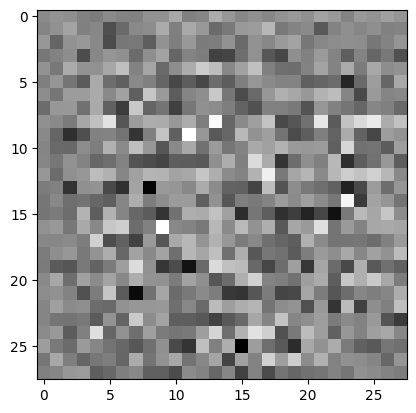

In [56]:
#using the untrained generator to generate an image from random noise
generator=make_generator_model()

noise=tf.random.normal([1,100])
generated_image=generator(noise,training=False)

plt.imshow(generated_image[0,:,:,0],cmap='gray')

DISCRIMINATOR

In [57]:
def make_discriminator_model():
    model=tf.keras.Sequential()
    model.add(layers.Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=[28,28,1]))

    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128,(5,5),strides=(2,2),padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model



In [58]:
#using the untrained discriminator to predict whether an image is real or fake
discriminator=make_discriminator_model()
decision=discriminator(generated_image)
print(decision)

tf.Tensor([[-0.00140234]], shape=(1, 1), dtype=float32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


LOSS and OPTIMIZER

In [59]:
#This method returns a helper function to compute cross entropy loss
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True)

DISCRIMINATOR LOSS

In [60]:
def discriminator_loss(real_output,fake_output):
    real_loss=cross_entropy(tf.ones_like(real_output),real_output)
    fake_loss=cross_entropy(tf.zeros_like(fake_output),fake_output)
    total_loss=real_loss + fake_loss
    return total_loss

GENRATOR LOSS

In [61]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)

the discriminator and the generator optimizers are separate since we train two networks separately

In [62]:
generator_optimizer=tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer=tf.keras.optimizers.Adam(1e-4)

Saving the Checkpoints

In [63]:
checkpoint_dir='./training_checkpoints'
checkpoint_prefix=os.path.join(checkpoint_dir,"ckpt")
checkpoint=tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                              discriminator_optimizer=discriminator_optimizer,
                               generator=generator,
                               discriminator=discriminator)

**Defining the training loop**

In [64]:
EPOCHS=100
noise_dim=100 #noise dimension
num_examples_to_generate=16
seed=tf.random.normal([num_examples_to_generate,noise_dim])

In [65]:
#Notice the use of 'tf.function'
#This annotation causes the function to be "compiled"
@tf.function
def train_step(images):
    noise=tf.random.normal([BATCH_SIZE,noise_dim])

    with tf.GradientTape()as gen_tape,tf.GradientTape()as disc_tape:
      generated_images=generator(noise,training=True)

      real_output=discriminator(images,training=True)
      fake_output=discriminator(generated_images,training=True)

      gen_loss=generator_loss(fake_output)
      disc_loss=discriminator_loss(real_output,fake_output)

    gradients_of_generator=gen_tape.gradient(gen_loss,generator.trainable_variables)
    gradients_of_discriminator=disc_tape.gradient(disc_loss,discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainable_variables))


In [66]:
def train(dataset,epochs):
  for epoch in range(epochs):
    start=time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,epoch+1,seed)

    # Save the model every 15 epochs
    if(epoch+1)%15==0:
      checkpoint.save(file_prefix=checkpoint_prefix)

    print('Time for epoch {} is {} sec'.format(epoch+1,time.time()-start))

  #Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,epochs,seed)

**Generate and save Images**

In [70]:
def generate_and_save_images(model,epoch,test_input):
  #'training' is set to False.=> this is so all layers run in inference mde(batchnorm).
  prediction=model(test_input,training=False)

  fig=plt.figure(figsize=(4,4))

  for i in range(prediction.shape[0]):
    plt.subplot(4,4,i+1)
    plt.imshow(prediction[i,:,:,0]*127.5+127.5,cmap='gray')
    plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [68]:
#print("Gradient shape:",  gradient_of_discriminator[0].shape)
#print("Variable shape:", model.trainable_variables[0].shape)

**Training the Model**

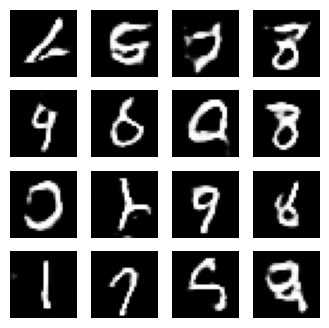

In [71]:
train(train_dataset,EPOCHS)

In [72]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [73]:
#Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

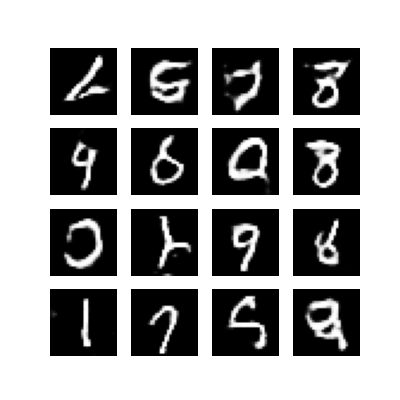

In [74]:
display_image(EPOCHS)

Use **imageio** to create an animated gif using the images saved during training

In [76]:
anim_file='dcgan.gif'

with imageio.get_writer(anim_file,mode='I') as writer:
  filenames=glob.glob('image*.png')
  filenames=sorted(filenames)
  for filenames in filenames:
    image=imageio.imread(filenames)
    writer.append_data(image)
  image=imageio.imread(filenames)
  writer.append_data(image)

<ipython-input-76-0fc9b81858d9>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread(filenames)
<ipython-input-76-0fc9b81858d9>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread(filenames)


In [78]:
!pip install --upgrade tensorflow-docs


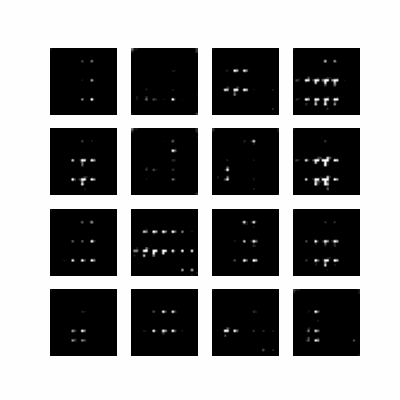

In [79]:
import tensorflow_docs.vis.embed as embed
# embed_file has been replaced with embed_file
embed.embed_file(anim_file)